# Module 2 - Data collection, validation and privacy


### Assignment overview

In this assignment, you will be exploring various aspects related to collecting data and identifying bias in datasets. You will also be asked to consider issues of data privacy and governance.

For this assignment, it is possible to work in **groups of up to 2 students**. 

### Group members
Leave blanks if group has less than 2 members:
- Student 1: Yanxin Liang 50798412
- Student 2: Yelia Ye 89657605

### Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:
1. Discuss the implications of data governance and data ownership in data science  
2. Argue the advantages and disadvantages of collecting individuals’ data online  
3. Distinguish between a sample and a population, what attributes make a representative sample and the possible ethical implications of a non-representative sample  
4. Explain the elements of experimental design 
5. Identify possible sources of bias in datasets (such as historical, measurement, and representation bias) 
6. Describe the ethical implications of variable choice in data science (e.g., use of proxies, use of gender and race as variables) 
7. Apply good practices for minimizing errors in data cleaning  
8. Apply methods for improving privacy and anonymity in stored data and data analysis, such as k-anonymity and randomized response 
9. Explain the notion of differential privacy 


# Part 1: Data collection, sampling and bias

In class, we discussed different sources of bias that can affect the data we want to use for our Data Science applications. Here is a summary:

### 1. Historical bias
**Historical bias:** bias that exists in society and is reflected in the data. It is the most insidious because it arises even if we are able to perfectly sample from the existing population. Most often, it affects groups that are historically disadvantaged.

E.g. In 2018, 5% of Fortune 500 CEOs were women. Historically, women have less frequently made it to a CEO position. A classifier trained to predict the best choice for a new CEO may learn this pattern and determine that being a woman makes one less qualified to be a CEO.

### 2. Representation bias
**Representation bias:** the sample underrepresents part(s) of the population and fails to generalize well. This may happen for different reasons:

1. The sampling methods only reached a portion of the population. E.g. Data collected via smartphone apps can under-represent lower incomes or older groups, who may be less likely to own smartphones.

2. The population of interest has changed or is distinct from the sample used during model training. E.g. Data that is representative of Vancouver may not be representative if used to analyze the population in Toronto. Similarly, data representative of Vancouver 100 years ago may not reflect today's population. 

### 3. Measurement bias
**Measurement bias:** it occurs when choosing features that fail to correctly represent the problem, or when there are issues with the data collection. Fore example:

1. The measurement processes varies across groups. E.g. one group of workers is monitored more closely and thus more errors are observed in that group.

2. The quality of data varies across groups. E.g. women often self-report less pain than men and are therefore less likely to receive certain diagnoses

3. The defined classification task or one of the features used is an oversimplification. E.g. We are designing a model to predict whether a student will be successful in college. We choose to predict the final GPA as metric of success. This, however, ignores other indicators of success.

**Question 1** 

Consider a crowd-sourcing project called [Street Bump](https://www.boston.gov/transportation/street-bump) aimed at helping improve neighbourhood streets in Boston from 2011 to 2014. Volunteers used a smartphone app, which captured GPS location and reported back to the city everytime the driver hit a pothole. The data was provided to governments so they could use the data to fix any road issues.

Can you think of any sources of bias in the scenario above? Explain them. 

The biases in the Street Bump project are primarily representation bias and measurement bias. Firstly, in terms of representativeness bias, the program relies on volunteers to participate and report data, and there is a high probability that this participation will not be evenly distributed across all neighborhoods. This would result in the system being more likely to receive more pothole reports from neighborhoods with high volunteer participation, leading to uneven street maintenance across neighborhoods; similarly, the program relies on a smartphone app as well as GPS. this means that it gets its data primarily from people who have smartphones. This excludes people who do not have access to a smartphone, which usually comes from people with low incomes or the elderly. As a result, affluent neighborhoods with more smartphone users are more likely to report a road issue, which can also lead to uneven street maintenance in different neighborhoods. Secondly, is measurement bias, which can result in different volunteers reporting different results for the same road problem due to differences in the type of vehicle the volunteers drive, their driving habits (including speed, etc.), and the sensitivity of their cell phones to detecting bumps.|

## Observational and experimental studies

- **Observational study:** study where there is no deliberate human intervention regarding the variable under investigation. Observational studies are ones where researchers observe the effect of a treatment/intervention without trying to change who is or isn’t exposed to it. In an observational study, the subjects are assigned or assign themselves to the exposure group they belong to.
- **Experimental study:**  study that involves planned intervention on the exposure to a condition. In an experiment, subjects are assigned to a condition by the researcher and thus one can establish a cause-and-effect relationship when we see a difference in the outcome between the experimental groups. Randomizing study subjects balances any differences between treatment groups with respect to all variables except the condition of exposure.

## A/B testing

A/B testing can be considered the most basic kind of randomized controlled experiment. 

Complete the following reading, then answer the comprehension questions below: https://hbr.org/2017/06/a-refresher-on-ab-testing

**Question 2**

In the following table, select which statements are true or false:

| Statement | True | False |
| -------- | :------- | :------- |
| A/B testing is an example of experimental study. |    X    |        | 
| Observational studies require subjects to not be informed that they are being studied. |        |    X    |  
| Ethical experimental studies require genuine uncertainty about the benefits/harms of treatment or exposure (equipoise) |    X    |        | 
| A researcher is interested in studying the effects of certain dietary habits. They recruite people and, through a survey, they ask them to disclose their current dietary habits, on which bases they will be assigned to treatment or control group. This is an example of experimantal study. |        |    X    | 
| The control group and the exposed group must include different individuals. |        |    X    | 
| One of the main advantages of experimental studies is that they allow for better randomization. |    X    |        | 



**Question 3**

Explain the role of blocking in A/B testing.

Blocking in A/B testing refers to grouping experimental units that are similar into blocks based on one or more variables that could influence the outcome. Some variables might have a strong effect on the success metric, so blocking can control the effects of these confounding variables, isolating the true effect. Within each block, differences are minimized, which reduces noise in the data and makes it easier to detect any impact of the treatment. 

**Question 4**

The authors warn about observing too many metrics when running an A/B test. Why is that the case? What could happen if I ignore this warning?

If you observe too many metrics, the risk of spurious correlations increases. This occurs because random fluctuations in the data may lead you to incorrectly associate certain variables with each other, even though they aren’t causally related. Moreover, observing too many metrics can distract you from your key goal. Instead of considering  'What’s really happening with this key variable?” you might focus too much on some insignificant changes. 

**Question 5** 

You want to determine the size of the subscribe button on your website. You plan to evaluate the performance by the number of visitors who click on the button. To run the test, you show one set of users one version and collect information about the number of visitors who click on the button. One month later you show users another version where the only thing different is the size of the button. Based on this test, you determine that the second version had a higher number of visitors who clicked on the button. Can you conclude that this version of the website leads to a higher number of visitors clicking on the button? Briefly explain.  

No, because in this case, two tests are run at different times with the same user, which is not a randomized controlled experiment. During two different time slots, user preferences may change. For example, if the weather becomes hotter and your website is about how to cool down in summer, a topic that people need, subscriptions may increase regardless of the button size. Additionally, since the test is applied to the same user, the change in the button might attract more subscriptions due to a sense of novelty compared to the previous version. Therefore, we cannot conclude that the second version of the website is better, as the experiment is not randomized, and the number of visitors clicking the button is influenced by changes in user preferences or the sense of novelty.

### Ethical A/B testing
Ethical A/B testing still requires all the ethical considerations of any experimental study, such as informed consent or possibility to opt out. A notorious case of a company failing to meet ethics requirement in A/B testing is the infamous Facebook "social contagion experiment", in which almost 700,000 users were showed, for a week, only positive or only negative content, to see how this variation impacted their online behaviour. The selected users were not informed and could not opt out. Furthermore, their emotional state was affected. Facebook defended itself by saying that Facebook's Data Use Policy warns users that Facebook “may use the information we receive about you…for internal operations, including troubleshooting, data analysis, testing, research and service improvement”. This defense was largely rejected by the scientific community, which still considered the study as unethical. You can read more about this incident in this [article](https://www.theguardian.com/technology/2014/jun/30/facebook-emotion-study-breached-ethical-guidelines-researchers-say). 

## Case Study: National Institute of Justice's (NIJ) Recidivism Dataset 

We will now look at the NIJ's Recidivism data set, which contains data on 26,000 individuals from the State of Georgia released from prison on parole (early release from prison where the person agrees to abide by certain conditions) between January 1, 2013 and December 31, 2015. **Recidivism** is the act of committing another crime.

This dataset is split into two sets, training and test, 70% of the data is in the training dataset and 30% in the test dataset. The training set contains four variables that measure recidivism: whether an individual recidivated within three years of the supervision start date and whether they recidivated in year 1, year 2, or year 3. In this data set, recidivism is defined as being arrested for a new crime during this three-year period. The test set does not include these four variables. 

The data was provided by the Georgia Department of Community Supervision (GDCS) and the Georgia Bureau of Investigation.

*Source: https://data.ojp.usdoj.gov/stories/s/daxx-hznc*

Let's start by familiarizing with the [dataset source](https://nij.ojp.gov/funding/recidivism-forecasting-challenge). The website includes a lot of information on the dataset and a detailed description of each of its columns (look for Appendix 2: Codebook).



**Question 6**
Think about how the data set was collected and what we are trying to predict. Are there any potential sources of bias (historical, representation, measurement)? Explain your answer. 

There are 3 potential sources of bias, which is historical bias, representation bias and measurement bias.

Historical bias is the bias exists in society and is reflected in the data. Since this data includes race and certain racial groups have been historically over-policed, the model may predict higher recidivism rates for these groups. Not because they are more likely to reoffend, but due to the unequal treatment they experience within the justice system.

Representation bias occurs when sampling methods capture only a portion of the population, leading to the underrepresentation of certain groups. This data was collected from the state of Georgia, but the factors that influence recidivism in Georgia may differ from those in other states. As a result, if we aim to forecast recidivism across the entire United States, this dataset might not represent the broader national population.

Measurement bias arises when there is a issue with data collection. For example, some individuals may have committed another crime but were not arrested within the three-year period, while others may have been arrested for reasons unrelated to committing a new crime. So the measurement processes varies across groups and result in measurement bias.

### Question 7: Exploratory Data Analysis (EDA)

We are now going to perform some Exploratory Data Analysis on the NIJ's Recidivism Training set. This will serve 2 purposes:
- it will help us familiarize with the dataset
- it will help us spot possible imbalances or sources of bias in the dataset

You are free to use tools and functions of your choice to complete the EDA. Your goal is to answer the following questions:
1. Does the dataset include protected characteristics? We recommend using the [BC Human Rights Code](http://www.bchrt.bc.ca/human-rights-duties/characteristics.htm) for reference.
2. If the dataset includes protected characteristic, do you think they are necessary to perform the predictive task? Why or why not?
3. If we were to remove the columns including protected characteristics, do you think it would still be possible to retrieve that information through other features (proxies)? Explain how.
4. Is the target variable balanced? If not, what could happen?
5. Is the target variable balanced *across protected segments of the population?* What could happen if this is not the case? 
6. Are there features with missing values? Do you suspect that they may be Missing Not At Random (MNAR), and if so, how would it be best to fill this information?

**Notes:**
- Bar charts and other plots are helpful to visually spot imbalances
- You are encouraged to talk to the instructor and TA to discuss your EDA strategy and if you need suggestions with the code

In [1]:
# Your solution here. You may add more code/markdown cells as needed. 
import pandas as pd
df = pd.read_csv('module2training.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18028 entries, 0 to 18027
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 18028 non-null  int64  
 1   Gender                                             18028 non-null  object 
 2   Race                                               18028 non-null  object 
 3   Age_at_Release                                     18028 non-null  object 
 4   Residence_PUMA                                     18028 non-null  int64  
 5   Gang_Affiliated                                    15811 non-null  object 
 6   Supervision_Risk_Score_First                       17698 non-null  float64
 7   Supervision_Level_First                            16816 non-null  object 
 8   Education_Level                                    18028 non-null  object 
 9   Depend

1. Does the dataset include protected characteristics? We recommend using the [BC Human Rights Code](http://www.bchrt.bc.ca/human-rights-duties/characteristics.htm) for reference.

Yes, the dataset include protected characteristics. Accroding to the BC Human Rights Code, the protected characteristics in the dataset are Gender, Race, and Age_at_Release. They are protected because they should not be used as a basis for discrimination. We should carefully handle this to avoid bias into our models.

2. If the dataset includes protected characteristic, do you think they are necessary to perform the predictive task? Why or why not?

The protected characteristic Age may be necessary to perform the predictive task, while Gender and Race should be used with caution or excluded. Age is often associated with recidivism rates. Adding age to predictive models may help improve the accuracy of recidivism predictions. However, we must ensure that age is used fairly to prevent discrimination based on age. The use of gender and race as predictors can have serious ethical issues. They may reflect historical biases, such as racial or gender discrimination. This is not at all what we are looking for as a true predictor of behavior. Therefore, Gender and Race should be excluded or carefully considered.

3. If we were to remove the columns including protected characteristics, do you think it would still be possible to retrieve that information through other features (proxies)? Explain how.

Yes, even if we remove the columns including protected characteristics like Gender, Race, and Age, it may still be possible to infer from proxy variables. 
!!!!!



In [2]:
df['Recidivism_Within_3years'].value_counts(normalize=True)

Recidivism_Within_3years
True     0.578045
False    0.421955
Name: proportion, dtype: float64

4. Is the target variable balanced? If not, what could happen?

No, from the above, the target variable Recidivism_Within_3_Years is not balanced. This means that more than half of the individuals in the dataset recidivated within three years of release. If we use imbalanced data to train our predictive model, the model may predict "recidivism" more often, since it's the more frequent outcome. And it might incorrectly predicte recidivism for individuals who do not recidivate.

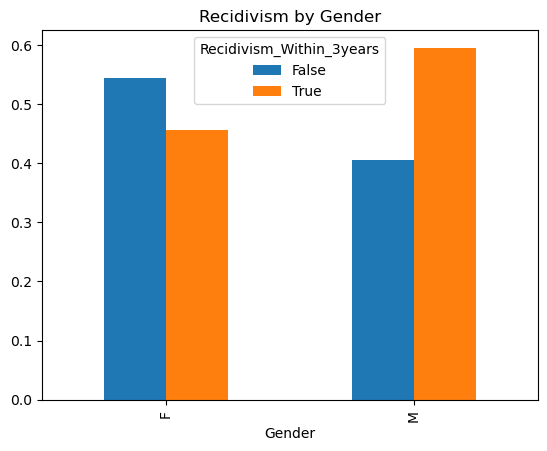

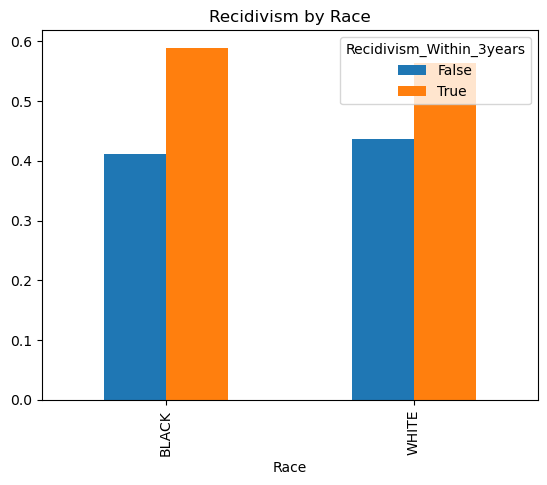

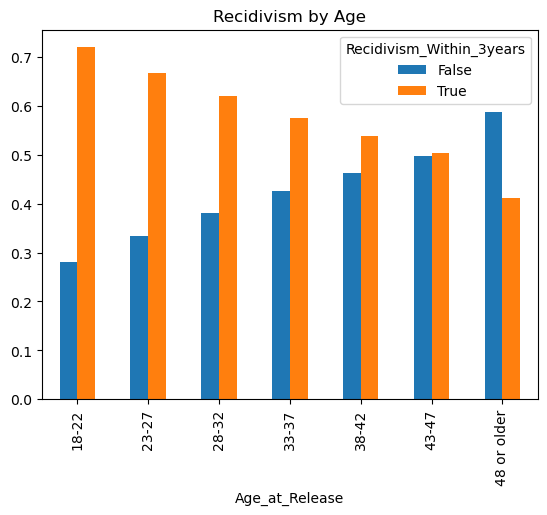

In [21]:
import matplotlib.pyplot as plt

df.groupby('Gender')['Recidivism_Within_3years'].value_counts(normalize=True).unstack().plot(kind='bar', title='Recidivism by Gender')
plt.show()

df.groupby('Race')['Recidivism_Within_3years'].value_counts(normalize=True).unstack().plot(kind='bar', title='Recidivism by Race')
plt.show()

df.groupby('Age_at_Release')['Recidivism_Within_3years'].value_counts(normalize=True).unstack().plot(kind='bar', title='Recidivism by Age')
plt.show()

5. Is the target variable balanced *across protected segments of the population?* What could happen if this is not the case? 

The target variable Recidivism_Within_3years is not balanced between protected groups. This is evident from the three plots above, where there are differences in recidivism rates between these groups. For example, if a certain race has a much higher recidivism rate. Then a machine learning model trained based on this imbalance may be biased and predict a higher recidivism rate for individuals of that race, regardless of other factors, and may even risk racial discrimination. This imbalance could perpetuate existing social biases and lead to unfair treatment of certain groups.


In [4]:
df.isnull().sum()

ID                                                      0
Gender                                                  0
Race                                                    0
Age_at_Release                                          0
Residence_PUMA                                          0
Gang_Affiliated                                      2217
Supervision_Risk_Score_First                          330
Supervision_Level_First                              1212
Education_Level                                         0
Dependents                                              0
Prison_Offense                                       2321
Prison_Years                                            0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_E

6. Are there features with missing values? Do you suspect that they may be Missing Not At Random (MNAR), and if so, how would it be best to fill this information?

There are features with missing value, such as Gang_Affiliated, and several features related to drug testing. Some of these missing values may be Missing Not At Random (MNAR) since the corresponding individual may not have a record of that aspect of the variable. The chances of those variables being missing correlate to the variable itself. For example, an individual's failure to take certain drug tests can result in this information being missing, making the data MNAR.


# Part 2: Privacy



When collecting data for a study, privacy is almost always a primary concern. Our data set may include information that makes it possible to identify an individual, including:

- **Direct identifiers**, which are the ones that can be used to uniquely identify an individual or a household in a dataset, such as a record ID number, patient number, social insurance number, full address, etc. Usually, name is also considered a direct identifier (although several people can have the same name). Other features such as age, date of birth, or postal code are not sufficient on their own to uniquely identify an individual and would not be considered direct identifiers.
- **Indirect (or quasi) identifiers**, which are the columns that do not themselves identify any individual or household, but can do so when combined with other indirect-identifiers. For example, postal code and date of birth are often indirect identifiers, because it is very likely that within a zip code only one individual has this particular birth date. The more indirect identifiers that you have, the more likely it is that individuals become identifiable because there are more possible unique combinations of identifying features.

### Question 8
1. Which columns in the NIJ dataset are direct identifiers? Briefly motivate your answer.
2. Which of the remaining columns make good candidates for indirect identifiers? Which ones do not?

Hint: It can be useful to use the `nunique()` and `value_counts()` dataframe methods to get an idea of how many distinct values a feature has.


In [5]:
# Your answer here (code portion)
df.nunique()


ID                                                   18028
Gender                                                   2
Race                                                     2
Age_at_Release                                           7
Residence_PUMA                                          25
Gang_Affiliated                                          2
Supervision_Risk_Score_First                            10
Supervision_Level_First                                  3
Education_Level                                          3
Dependents                                               4
Prison_Offense                                           5
Prison_Years                                             4
Prior_Arrest_Episodes_Felony                            11
Prior_Arrest_Episodes_Misd                               7
Prior_Arrest_Episodes_Violent                            4
Prior_Arrest_Episodes_Property                           6
Prior_Arrest_Episodes_Drug                              

1. Which columns in the NIJ dataset are direct identifiers? Briefly motivate your answer.

The column ID has 18028 unique values, which means that the column saves a unique identifier for every individual in the dataset. So, ID is an direct identifier in thr NIJ dataset.

2. Which of the remaining columns make good candidates for indirect identifiers? Which ones do not?

The columns have limited unique values and contain some personal information can make good candidates for indirect identifieres, such as Gender, Race, Age_at_Release, Residence_PUMA. Features with fewer unique values can not directly identifying individuals on their own, but they can be used to filter individuals when combined those features. The columns, which do not contain the information that can be used to identify individuals, don't make good candidates for indirect identifiers, such as Supervision_Risk_Score_First, Gang_Affiliated, Supervision_Level_First, and so on.

## De-identification of structured data

To safeguard the privacy of the individuals in our dataset, we need to make sure that they are not identifiable, either directly or indirectly. There are three main strategies to achieve this: suppression, pseudonymization, and generalization.

### Suppression
Suppression is an effective way to get rid of a direct identifier by simply removing the entire column. 

**Question 9:** using the appropriate dataframe methods, suppress all direct identifier in the NIJ training set. Save the result in a new dataframe called `suppressed_df`

In [6]:
# Your answer here 
suppressed_df = df.drop(columns=['ID'])
suppressed_df

,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,...,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
0,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,Drug,...,0.0,0.000000,0.0,0.488562,0.447610,False,False,False,False,False
1,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,...,0.0,0.000000,0.0,0.425234,2.000000,False,True,False,False,True
2,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,Drug,...,0.0,0.166667,0.0,0.000000,0.000000,False,True,False,True,False
3,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,Property,...,0.0,0.000000,0.0,1.000000,0.718996,False,False,False,False,False
4,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,Violent/Non-Sex,...,0.0,0.058824,0.0,0.203562,0.929389,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18023,M,BLACK,23-27,9,False,5.0,Standard,At least some college,1,NaN,...,0.0,0.000000,0.0,0.189507,0.572044,False,True,True,False,False
18024,M,WHITE,38-42,25,False,5.0,Standard,At least some college,3 or more,NaN,...,0.0,0.000000,0.0,0.757098,0.576104,False,True,False,True,False
18025,M,BLACK,33-37,15,False,5.0,Standard,At least some college,3 or more,NaN,...,NaN,NaN,NaN,0.711138,0.894125,False,True,False,True,False
18026,F,WHITE,33-37,15,NaN,5.0,Standard,At least some college,3 or more,NaN,...,0.0,0.000000,0.0,0.000000,0.000000,True,False,False,False,False


### Pseudonymization

A big issue with suppression of direct identifier is that it is not reversible. If at some point we need to identify an individual in our dataset, we would be out of luck. If you have reasons to believe that re-identification may be required, pseudonymization would be a better option to handle direct identifiers. Pseudonymization replaces one or more direct identifiers with a unique but less meaningful value. Usually when we pseudonymize an identifier, there is a possibility of re-identification if required (but it would not be available to the general public).

**Question 10:** pseudomyze the ID column of the NIJ training set and save the result in a new dataframe called `pseudo_df`. In a different code cell, show that it is possible to re-identify the samples by converting them back to the original ID number.

There are different ways to achieve this you may want to explore:
- Write your own pseudonymization function. You should write at least 2 functions: one to pseudomyze, and another to re-identify. The function does not have to be exceedingly complex but it should not be obvious either (e.g. only basic arithmetic involved).
- Use an extisting library, such as [`cryptography`](https://cryptography.io/en/latest/).

In [18]:
# Your answer here (you may add more cells as needed)
from cryptography.fernet import Fernet

key = Fernet.generate_key()
f = Fernet(key)

def pseudonymize_id(ids, cipher):
    return ids.apply(lambda x: f.encrypt(str(x).encode()).decode())


def reidentify_id(pseudo_ids, cipher):
    return pseudo_ids.apply(lambda x: f.decrypt(x.encode()).decode())


pseudo_df=df.drop(columns=['ID'])
pseudo_df.insert(0, 'Pseudonymized_ID', pseudonymize_id(df['ID'], f))


pseudo_df 

,Pseudonymized_ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
0,gAAAAABm_foEhIaBZeGk2fgVCnWMySY35PSQqElaFSXQ4g...,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.0,0.000000,0.0,0.488562,0.447610,False,False,False,False,False
1,gAAAAABm_foEorPZ2__f0Q9VrV5OABYtRrHgbPbMfA-PTQ...,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.0,0.000000,0.0,0.425234,2.000000,False,True,False,False,True
2,gAAAAABm_foExwdyIcSLokBL0qsjitUbO4VqBFWrNG_HTx...,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.0,0.166667,0.0,0.000000,0.000000,False,True,False,True,False
3,gAAAAABm_foE6Qw_6a2oFOXkrDxx8nlGjBG8fv5b2K04PA...,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.0,0.000000,0.0,1.000000,0.718996,False,False,False,False,False
4,gAAAAABm_foEAlxUUbzeyMHfzHwrpR2Eh1nhYJoANpljEC...,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.0,0.058824,0.0,0.203562,0.929389,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18023,gAAAAABm_foE2GnxuiqbXRgb4HvUi15-lawWurwarDEvYO...,M,BLACK,23-27,9,False,5.0,Standard,At least some college,1,...,0.0,0.000000,0.0,0.189507,0.572044,False,True,True,False,False
18024,gAAAAABm_foEoBr9ERIfgNh2-Oft7Vnx9d7NUFfC9KFcXs...,M,WHITE,38-42,25,False,5.0,Standard,At least some college,3 or more,...,0.0,0.000000,0.0,0.757098,0.576104,False,True,False,True,False
18025,gAAAAABm_foEi2Qz6iIzkm00meMVqvnYdpHbhCwpc04e0Q...,M,BLACK,33-37,15,False,5.0,Standard,At least some college,3 or more,...,NaN,NaN,NaN,0.711138,0.894125,False,True,False,True,False
18026,gAAAAABm_foEogjtn9HrdLl0RtIqtoXPiG2uWBhYaKakQy...,F,WHITE,33-37,15,NaN,5.0,Standard,At least some college,3 or more,...,0.0,0.000000,0.0,0.000000,0.000000,True,False,False,False,False


In [19]:
show_result=pd.DataFrame([df["ID"], reidentify_id(pseudo_df['Pseudonymized_ID'], f)]).transpose()
show_result

,ID,Pseudonymized_ID
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
...,...,...
18023,26756,26756
18024,26758,26758
18025,26759,26759
18026,26760,26760


### Generalization

Generalization is a commonly used technique in anonymization, which involves reducing the precision of a column. For example, the date of birth or the date of a doctor's visit can be generalized to a month and year, to a year, or to a five-year interval. Generalization can help achieving $k$-anonymity. 

To check for $k$-anonymity, we will use the [`pycanon` library](https://github.com/IFCA/pycanon). You can install this library in your virtual environment by running the command:

```
pip install pycanon
```

**Question 11:** `pycanon` includes several functions (feel free to explore them in the related documentation), but we will only be using `k-anonimity`. Look at the documentation, then use `k-anonimity` to determine the $k$-anonymity of the following groups of variables:

- $k$-anonymity of Gender and Race features: 743
- $k$-anonymity of Gender, Race, and Age_at_Release features: 44
- $k$-anonymity of Gender, Race, Age_at_Release and Residence_PUMA features: 1

In [17]:
from pycanon import anonymity

# Your answer here
k_anonymity_gender_race = anonymity.k_anonymity(df,['Gender','Race'])
print("k-anonymity of Gender and Race features:",k_anonymity_gender_race)
k_anonymity_gender_race_age = anonymity.k_anonymity(df,['Gender','Race', 'Age_at_Release'])
print("k-anonymity of Gender, Race, and Age_at_Release features:",k_anonymity_gender_race_age)
k_anonymity_gender_race_age_residence = anonymity.k_anonymity(df,['Gender', 'Race', 'Age_at_Release', 'Residence_PUMA'])
print("k-anonymity of Gender, Race, Age_at_Release and Residence_PUMA features:",k_anonymity_gender_race_age_residence)

k-anonymity of Gender and Race features: 743
k-anonymity of Gender, Race, and Age_at_Release features: 44
k-anonymity of Gender, Race, Age_at_Release and Residence_PUMA features: 1


The $k$-anonymity of the combination of Gender, Race, Age_at_Release and Residence_PUMA is clearly problematic! It would be very easy to identify someone if we knew these 4 pieces of information about them. 

**Question 12:** can you bin the Residence_PUMA feature to achieve 4-anonymity for this set of features? Add the new column to the existing dataframe, using the name `Binned_PUMA`.

For this task, you may want to look into the `cut()` and `qcut()` functions of the pandas library.

Remember that now, when checking for $k$-anonymity, you should be looking at the new column `Binned_PUMA`, not at `Residence_PUMA`.

In [13]:
df['Binned_PUMA'] = pd.cut(df['Residence_PUMA'], bins=5,labels=['Bin1', 'Bin2', 'Bin3','Bin4','Bin5'])

k_anonymity_gender_race_age_binned_puma = anonymity.k_anonymity(df, ['Gender', 'Race', 'Age_at_Release', 'Binned_PUMA'])
print("k-anonymity of Gender, Race, Age_at_Release and Binned_PUMA features:", k_anonymity_gender_race_age_binned_puma)

With 4-anonymity for these set of features, we can rest assured that there are at least 4 individuals sharing the same combination, making it more difficult to identify someone by knowing only these 4 pieces of information. However, let's not ignore the following issues:
- We did not test $k$-anonymity for other combinations of features, so it is very likely that our dataset is still not anonymized.
- 4-anonymity is not very strong; if I can narrow down my search to 4 people, I can still learn a lot about a person (at least approximatively).
- We may lose $k$-anonymity by adding more information.

## Differential Privacy

As discussed in class, differential privacy is a stronger, mathematically robust definition of privacy for an algorithm. You can learn more about it by watching this video from Minute Physics: [Protecting Privacy with MATH](https://www.youtube.com/watch?v=pT19VwBAqKA)

After watching this video, try answering the following questions:
1. If you have two differentially private datasets, one with and one without your data, what does differential privacy guarantee regarding your privacy?
2. An algorithm has differential privacy $\epsilon$ = 2, another one $\epsilon$ = 4. Which one provides a higher level of privacy? Explain your answer.
3. The video highlights at least two of the main challenges with differential privacy. Summarize them.

1. For differentially private datasets, the change in output is minimal when a single sample is added or removed. This two differentially private datasets produce similar results regardless of whether your data is included. Because of these similar outputs, it is difficult to determine with high certainty whether your data was used, ensuring your privacy is protected.

2. The algorithm with differential privacy $\epsilon$ = 2 provides a higher level of privacy compared to larger values of $\epsilon$ =4. $e^\epsilon$ measure the maximum distance between a query on database (x) and the same query on database (y). A smaller value of $\epsilon$ leads to a smaller difference in the results when given similar inputs, thereby providing higher levels of privacy.

3.  The first challenge is balancing the benefits of accurate statistics against the drawbacks of revealing some private information. The second challenge is mathematically quantifying and controlling the privacy loss when releasing data.


## Randomized response

In class, we described randomized polling as a way to conduct interviews including sensitive questions, while protecting individuals' privacy. 

**Question 13:** imagine that UBC has been surveying students to understand how many of them have been cheating in a final exam. Because the information is very sensitive and students will most likely not want to share this information, they use the randomized polling protocol described in class. If 1000 students have been surveyed, and 300 of them responded "yes", what is the actual percentage of students who cheated in a final?

The actual percentage of students who cheated in a final is 10%. 
$$ x \cdot \frac{3}{4}  + (1 - x) \cdot  \frac{1}{4}  = \frac{3}{10} $$
$$\quad x = \frac{1}{10} $$


# Part 3: Data Governance 

Data governance refers to the set of policies, procedures and standards that companies and organization must adopt to ensure quality, sacurity and usability of the data in their possession. 

To gain a better understanding of what data governance is, why it is important and what common mistakes affect it, please read the following articles:
- https://www.egnyte.com/guides/governance/data-ownership
- https://atlan.com/data-governance-mistakes/#what-is-data-governance

As you can see, the issue of data governance is complex and multifaceted. A group of experts with a variety of experties is necessary to design and implement a robust data governance plan. Still, we can train ourselves to spot the most common mistakes when we see them. Take, for example, the following fictitional scenario (co-authored in collaboration with [ChatGPT](https://chat.openai.com/))

"SleekTech Solutions" is a cutting-edge technology company specializes in technologies related to artificial intelligence and data analytics. Their services include data analytics, big data processing, cloud computing, and Internet of Things (IoT). They offer their services to various industries, such as healthcare, finance, retail, manufacturing.

The company is young, only founded in 2021, and has rapidly expanded. At their inception, they used to accumulate data in a vast digital repository known as the "Data Lake." Initially, this seemed like a cost-effective solution to store all types of data, and they have not changed this strategy to this date. 

To increase agility, SleekTech's different divisions have significant autonomy over their data. This means that the same data may be recorded by different department using different standards and metrics. SleekTech also encourages a culture of openness. Employees have access to vast amounts of data, including sensitive customer information, to complete the tasks they are assigned to.

SleekTech has been expanding rapidly. Founded in Canada, is now looking to expand into new markets including US and Europe.

**Question 14:** using the readings as reference, outline at least 4 distinct mistakes that SleekTech Solutions is likely to commit because of their data governance strategy. 


Good data governance helps ensure the quality, integrity and security of an organization's data. From the text above, it appears that SleekTech's approach to data governance is flawed. Firstly, they accumulate data in a vast digital repository known as the “Data Lake”. Inefficiencies result from not properly categorizing and managing the data in the Data Lake. Secondly, since there is no clear requirement for data consistency, different departments may record the same data using different standards. This can lead to low data quality, and inconsistent data not only reduces operational efficiency, but also reduces the accuracy of decision-making. Third, SleekTech's policy is to open up a large amount of data to employees, including some private information. This does not ensure that sensitive data is handled appropriately or that individual privacy is protected. There is a risk of data breaches, data misuse, and violations of privacy laws. Fourth, !!!!!!!!!!!!!!!!!!

# Final thoughts

1) If you have completed this assignment in a group, please write a detailed description of how you divided the work and how you helped each other completing it:

2) Have you used ChatGPT or a similar Large Language Model (LLM) to complete this homework? Please describe how you used the tool. **We will never deduct points for using LLMs for completing homework assignments,** but this helps us understand how you are using the tool and advise you in case we believe you are using it incorrectly.

3) Have you struggled with some parts (or all) of this homework? Do you have pending questions you would like to ask? Write them down here!